<a href="https://colab.research.google.com/github/varunpothu/Smart_HealthCare_Chatbot/blob/main/EDA_For_Symtom_Medicine__Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install the required dependencies:

In [ ]:
pip install transformers datasets torch scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


#Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertForSequenceClassification
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import json

#Data Loading

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data Loading
file_path = "/content/drive/MyDrive/5.csv"
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

<ipython-input-4-f1763da3dfd2>:3: DtypeWarning: Columns (42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


id                      name                     substitute0  \
0   1  augmentin 625 duo tablet  Penciclav 500 mg/125 mg Tablet   
1   2       azithral 500 tablet         Zithrocare 500mg Tablet   
2   3          ascoril ls syrup                 Solvin LS Syrup   
3   4      allegra 120mg tablet                    Lcfex Tablet   
4   5            avil 25 tablet              Eralet 25mg Tablet   

              substitute1              substitute2            substitute3  \
0  Moxikind-CV 625 Tablet  Moxiforce-CV 625 Tablet     Fightox 625 Tablet   
1         Azax 500 Tablet          Zady 500 Tablet  Cazithro 500mg Tablet   
2       Ambrodil-LX Syrup        Zerotuss XP Syrup         Capex LS Syrup   
3     Etofex 120mg Tablet     Nexofex 120mg Tablet    Fexise 120mg Tablet   
4                     NaN                      NaN                    NaN   

               substitute4 sideEffect0       sideEffect1     sideEffect2  ...  \
0  Novamox CV 625mg Tablet    Vomiting            Nausea        Diarrhea  ...   
1    Trulimax 500mg Tablet    Vomiting            Nausea  Abdominal pain  ...   
2          Broxum LS Syrup      Nausea          Vomiting        Diarrhea  ...   
3     Histafree 120 Tablet    Headache        Drowsiness       Dizziness  ...   
4                      NaN  Sleepiness  Dryness in mouth             NaN  ...   

  sideEffect41                                               use0  \
0          NaN                  Treatment of Bacterial infections   
1          NaN                  Treatment of Bacterial infections   
2          NaN                      Treatment of Cough with mucus   
3          NaN  Treatment of Sneezing and runny nose due to al...   
4          NaN                   Treatment of Allergic conditions   

                               use1 use2 use3 use4  \
0                               NaN  NaN  NaN  NaN   
1                               NaN  NaN  NaN  NaN   
2                               NaN  NaN  NaN  NaN   
3  Treatment of Allergic conditions  NaN  NaN  NaN   
4                               NaN  NaN  NaN  NaN   

               Chemical Class Habit Forming Therapeutic Class  \
0                         NaN            No   ANTI INFECTIVES   
1                  Macrolides            No   ANTI INFECTIVES   
2                         NaN            No       RESPIRATORY   
3  Diphenylmethane Derivative            No       RESPIRATORY   
4       Pyridines Derivatives            No       RESPIRATORY   

                             Action Class  
0                                     NaN  
1                              Macrolides  
2                                     NaN  
3  H1 Antihistaminics (second Generation)  
4   H1 Antihistaminics (First Generation)  

[5 rows x 58 columns]

In [ ]:
# Information on Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248218 entries, 0 to 248217
Data columns (total 58 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 248218 non-null  int64 
 1   name               248218 non-null  object
 2   substitute0        238621 non-null  object
 3   substitute1        233867 non-null  object
 4   substitute2        230233 non-null  object
 5   substitute3        226856 non-null  object
 6   substitute4        223962 non-null  object
 7   sideEffect0        248218 non-null  object
 8   sideEffect1        238416 non-null  object
 9   sideEffect2        229500 non-null  object
 10  sideEffect3        207638 non-null  object
 11  sideEffect4        163560 non-null  object
 12  sideEffect5        131258 non-null  object
 13  sideEffect6        91857 non-null   object
 14  sideEffect7        67750 non-null   object
 15  sideEffect8        48506 non-null   object
 16  sideEffect9        3

In [ ]:
# Describing the data Stats
data.describe()

id
count  248218.000000
mean   124109.500000
std     71654.508896
min         1.000000
25%     62055.250000
50%    124109.500000
75%    186163.750000
max    248218.000000

#Exploratory Data Analysis (EDA)

In [ ]:
# Loading dataset separatly for EDA
data_new = pd.read_csv(file_path)

<ipython-input-12-0834daf716fb>:2: DtypeWarning: Columns (42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data_new = pd.read_csv(file_path)


<ipython-input-13-0f0fe93f32d0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=therapeutic_class_distribution.index, y=therapeutic_class_distribution.values, palette="Blues_d")


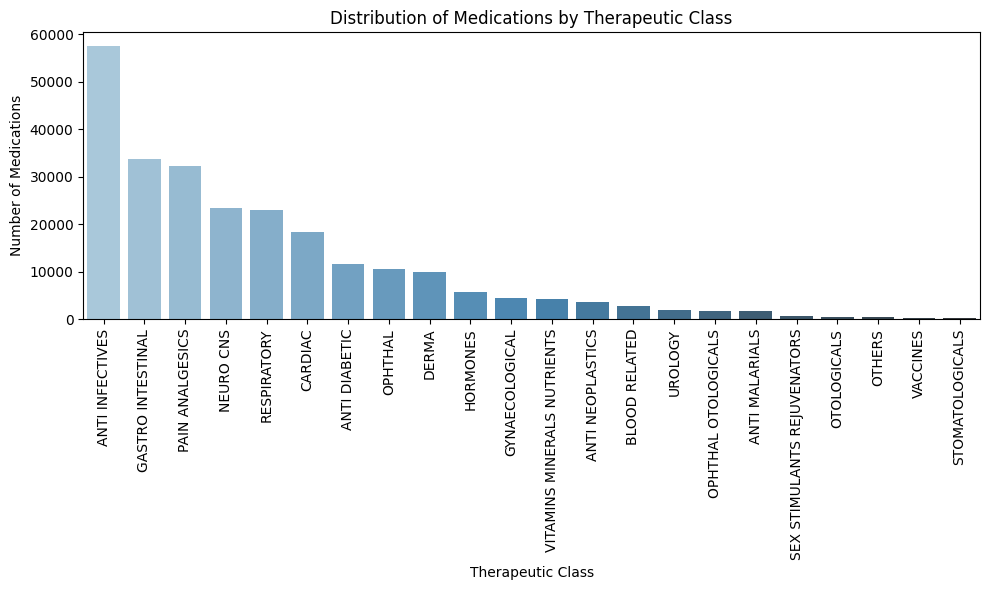

In [ ]:
# Distribution of Medications by Therapeutic Class
# Bar Plot

therapeutic_class_distribution = data_new['Therapeutic Class'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=therapeutic_class_distribution.index, y=therapeutic_class_distribution.values, palette="Blues_d")
plt.title('Distribution of Medications by Therapeutic Class')
plt.xlabel('Therapeutic Class')
plt.ylabel('Number of Medications')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

I can see that Anti-Infectives dominate with around 60,000 medications, followed by Gastro Intestinal and Pain Analgesics, each having 20,000 to 35,000 medications. Other classes like Urology and Anti Neoplastics have fewer, under 10,000. This suggests that infections and related treatments are the most common focus.

<ipython-input-14-66a6df98d6be>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=side_effects_count.index, y=side_effects_count.values, palette="Greens_d")


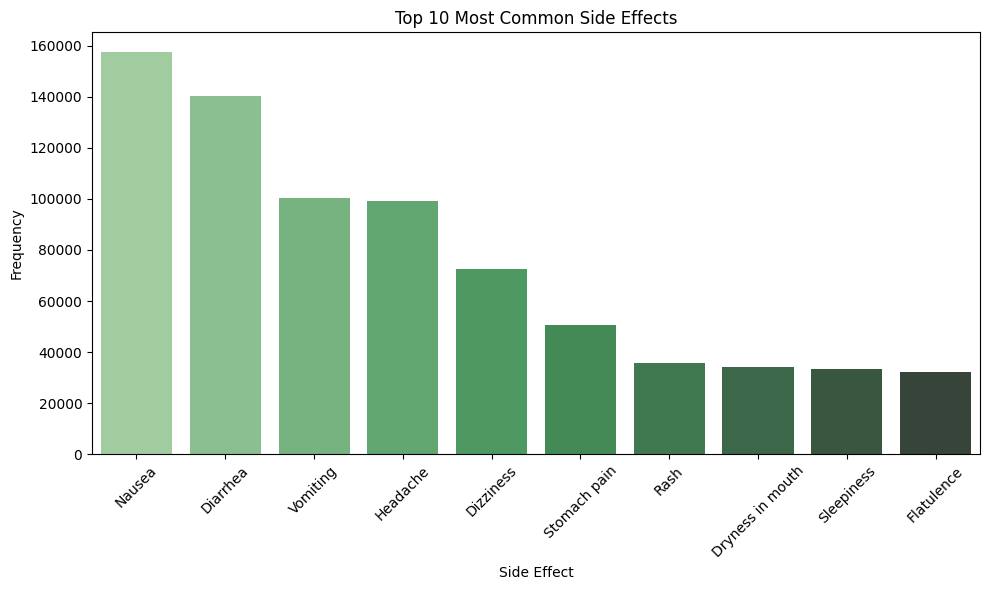

In [ ]:
# Top 10 Most Common Side Effects
# Bar Plot

side_effect_columns = [f'sideEffect{i}' for i in range(42)]
side_effects_count = data_new[side_effect_columns].apply(lambda col: col.value_counts()).sum(axis=1).sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=side_effects_count.index, y=side_effects_count.values, palette="Greens_d")
plt.title('Top 10 Most Common Side Effects')
plt.xlabel('Side Effect')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Nausea and Diarrhea are the most frequent side effects, each occurring around 150,000 times. Vomiting, Headache, and Dizziness are also prevalent, while side effects like Dryness in mouth, Sleepiness, and Flatulence are less common, with fewer than 50,000 instances. The focus seems to be on gastrointestinal and neurological effects.

<ipython-input-15-6021a2f715c5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_substitutes.index, y=top_substitutes.values, palette="Reds_d")


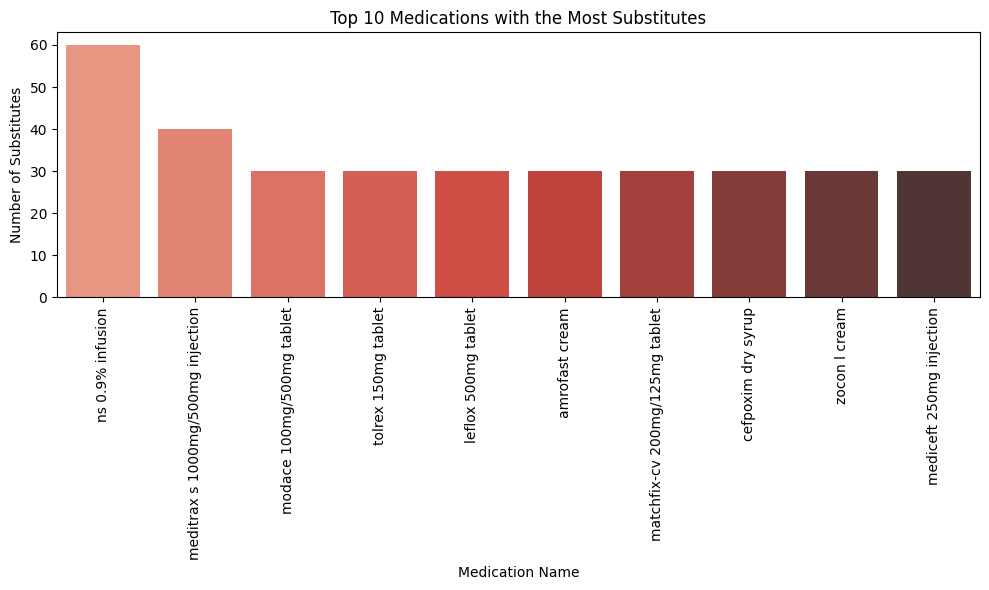

In [ ]:
# Top 10 Medications with the Most Substitutes
# Bar Plot

data_new['num_substitutes'] = data_new[['substitute0', 'substitute1', 'substitute2', 'substitute3', 'substitute4']].notna().sum(axis=1)
top_substitutes = data_new.groupby('name')['num_substitutes'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_substitutes.index, y=top_substitutes.values, palette="Reds_d")
plt.title('Top 10 Medications with the Most Substitutes')
plt.xlabel('Medication Name')
plt.ylabel('Number of Substitutes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

NS 0.9% infusion has the highest number of substitutes, with nearly 60 alternatives available. Meditrax S 1000mg/500mg injection follows with around 40 substitutes. The remaining medications, like Modace 100mg/500mg tablet and Zocon I cream, have between 25 and 35 substitutes each. This indicates that certain medications have a wide variety of alternatives, likely due to their common usage or interchangeable nature.

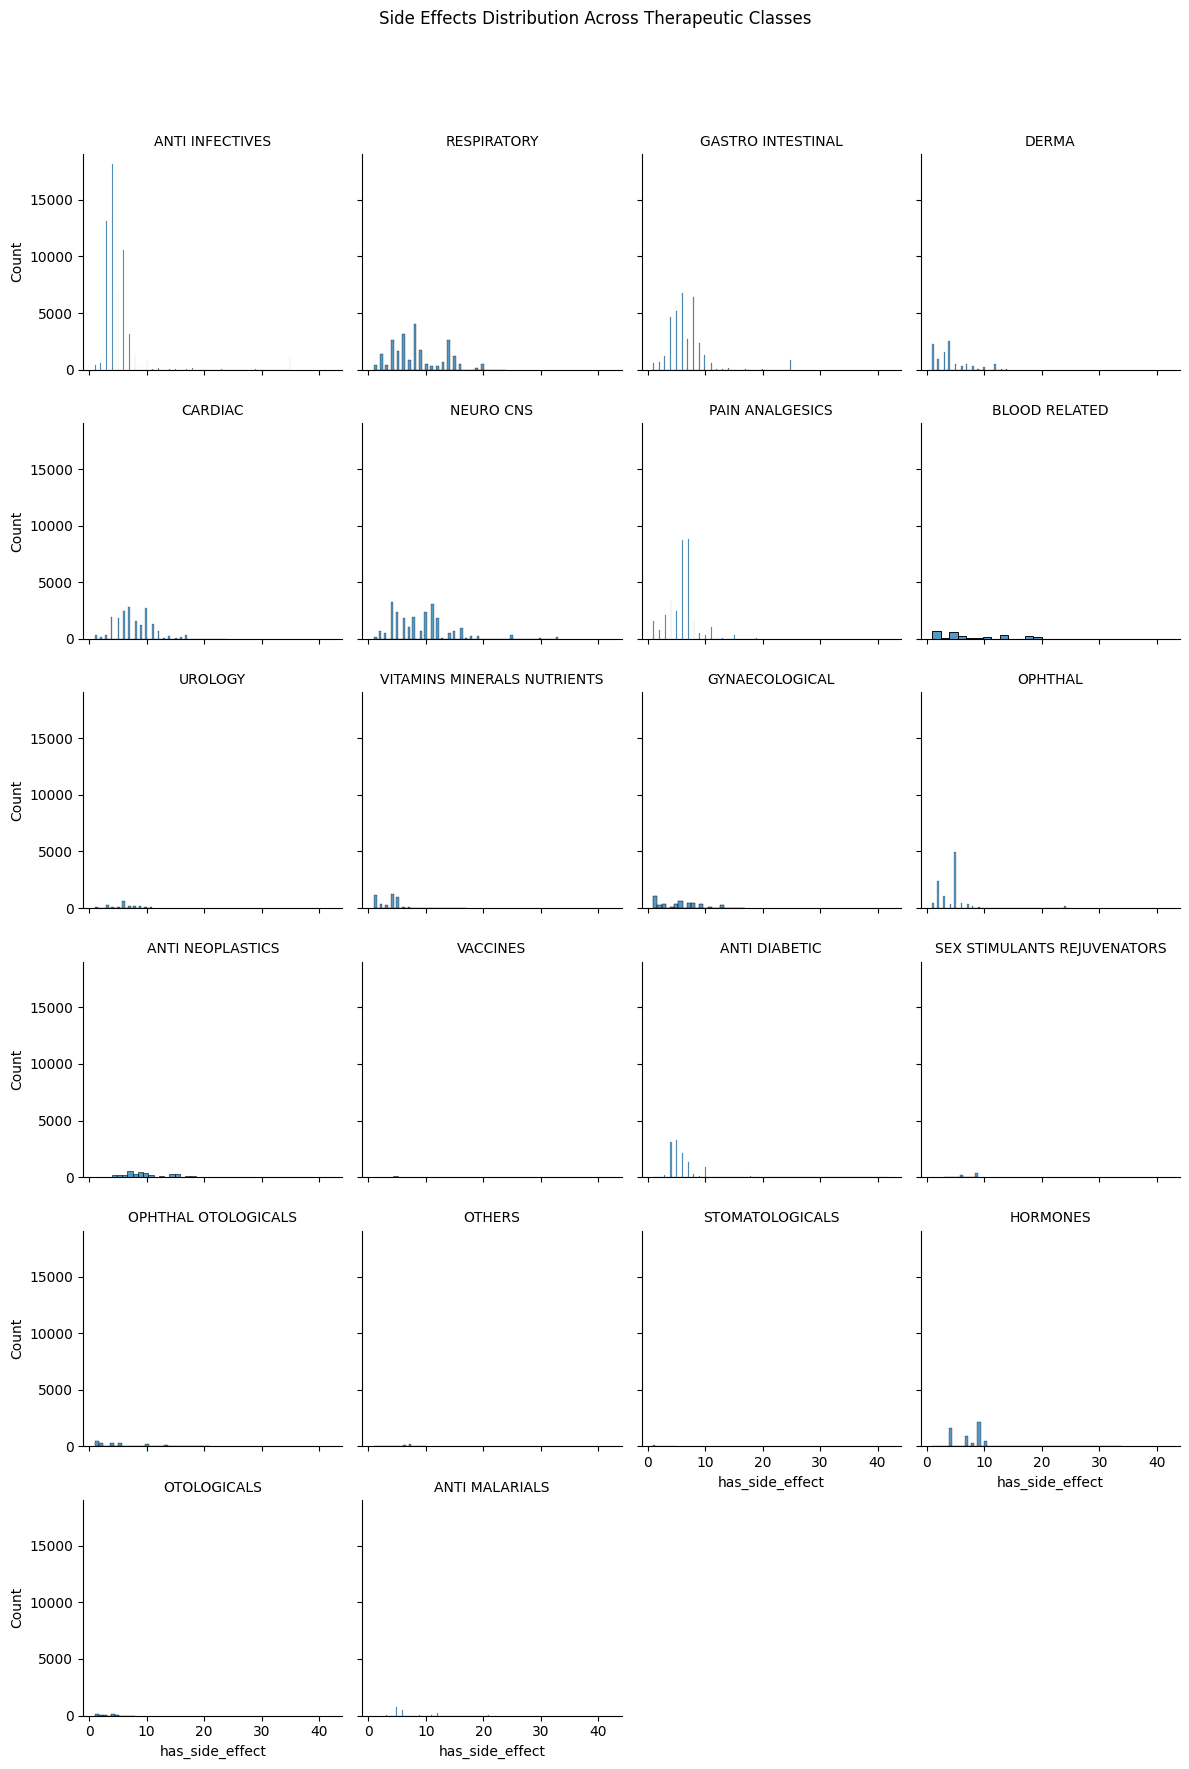

In [ ]:
# Comparing Side Effects Across Therapeutic Classes
side_effect_columns = [f'sideEffect{i}' for i in range(42)]
data_new['has_side_effect'] = data_new[side_effect_columns].notna().sum(axis=1)
g = sns.FacetGrid(data_new, col="Therapeutic Class", col_wrap=4, height=3)
g.map(sns.histplot, "has_side_effect")
g.set_titles("{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Side Effects Distribution Across Therapeutic Classes')
plt.show()



Each plot represents a different therapeutic class and shows the count of medications having side effects. I can see that classes like Anti-Infectives, Pain Analgesics, and Neuro CNS have a broader range of side effects, while others like Ophthal, Hormones, and Anti-Diabetic have fewer. This indicates that certain classes, such as anti-infectives, are associated with a wider variety of side effects compared to more specialized classes.

In [ ]:
# Sunburst Chart for Therapeutic Class and Action Class Distribution

# Handle missing values
# Filter out rows with "Unknown" or NaN in either column
filtered_data = data_new[
    data_new['Therapeutic Class'].notna() &  # Check for NaN values
    data_new['Action Class'].notna() &  # Check for NaN values
    (data_new['Therapeutic Class'] != 'Unknown') &
    (data_new['Action Class'] != 'Unknown')
]

# Creating Sunburst Chart
fig = px.sunburst(filtered_data, path=['Therapeutic Class', 'Action Class'],
                  title="Hierarchical Distribution of Therapeutic and Action Classes")

# Adjusting the figure size
fig.update_layout(
    width=1000,
    height=800,
    margin=dict(t=50, l=25, r=25, b=25)
)

# Show the plot
fig.show()

As I look at the sunburst chart, it feels like stepping into a grand library of medicines, each category representing a unique section of knowledge. At the center, I see the core therapeutic classes like "Anti-Infectives," "Neuro CNS," and "Cardiac," acting as the foundation of this vast system. These main categories guide me outward, where they branch into more specific action classes, each with its own role and purpose.

For example, under "Anti-Infectives," I notice specialized sections like "Macrolides" and "Cephalosporins," each representing a targeted approach to treating infections. Similarly, in the "Cardiac" category, I come across "HMG CoA inhibitors (statins)" and "Beta blockers," which highlight the diversity of treatments available for heart conditions. This chart helps me see the bigger picture while diving into the finer details, unraveling the complex hierarchy of medicines in a clear and captivating way.

In [ ]:
# Violin Plot with Plotly (for more interactive visualizations)
fig = px.violin(data_new, x="Therapeutic Class", y="has_side_effect", box=True, points="all",
                title="Violin Plot of Side Effects per Therapeutic Class")
fig.show()
